In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
#Reading in data file
vehicles_final = pd.read_csv("data/vehicles_cleaned.csv")

In [3]:
#Getting a view of the data file
vehicles_final.head()

,price,year,manufacturer,fuel,odometer,title_status,transmission,drive,type,lat,long
0,10299,2012.0,acura,gas,90186.0,clean,automatic,NaN,other,35.7636,-78.7443
1,9500,2011.0,jaguar,gas,85000.0,clean,automatic,NaN,NaN,36.1032,-79.8794
2,3995,2004.0,honda,gas,212526.0,clean,automatic,fwd,SUV,35.7636,-78.7443
3,12995,2015.0,kia,gas,85127.0,clean,automatic,4wd,wagon,35.7636,-78.7443
4,10995,2014.0,chevrolet,gas,112383.0,clean,automatic,fwd,SUV,35.7636,-78.7443


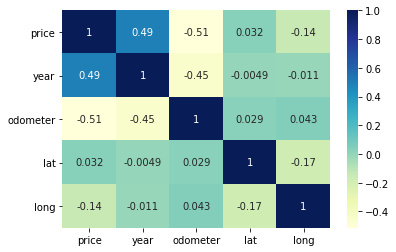

In [5]:
# #Create correlation heatmap using Seaborn library
corr = vehicles_final.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, 
yticklabels=corr.columns, annot=True, 
cmap="YlGnBu")

In [6]:
#Creating dummy variables
vehicles_final = pd.get_dummies(vehicles_final, drop_first=True)
print(vehicles_final.columns)

Index(['price', 'year', 'odometer', 'lat', 'long', 'manufacturer_alfa-romeo',
       'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw',
       'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge',
       'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford',
       'manufacturer_gmc', 'manufacturer_harley-davidson',
       'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti',
       'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia',
       'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln',
       'manufacturer_mazda', 'manufacturer_mercedes-benz',
       'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi',
       'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porche',
       'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn',
       'manufacturer_subaru', 'manufactu

In [7]:
#Filling remaining numerical NaN values with mean
vehicles_final.isnull().any()
vehicles_final = vehicles_final.fillna(vehicles_final.mean())

In [8]:
#Scaling our data
from sklearn.preprocessing import StandardScaler

#Getting column indexes and values w/ iloc and loc for our explanatory variables, scaling
X_head = vehicles_final.iloc[:, vehicles_final.columns != 'price']
X = vehicles_final.loc[:, vehicles_final.columns != 'price']
X = StandardScaler().fit_transform(X)

#Storing price as our response variable
y = vehicles_final['price']


## Random Forest Regression

In [9]:
#Creating our Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

#Creating our training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

#Creating Random Forest Regression model
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)
rfr_predictions = rfr_model.predict(X_test)

In [12]:
#Checking accuracy of model
rfr_mean_absolute_error = MAE(y_test, rfr_predictions)
print(f"Mean Absolute Error: {rfr_mean_absolute_error}.")
print(f"Accuracy Percentage: {rfr_model.score(X_test,y_test)}.")

Mean Absolute Error: 1782.2455311005208.
Accuracy Percentage: 0.8757341477530972.


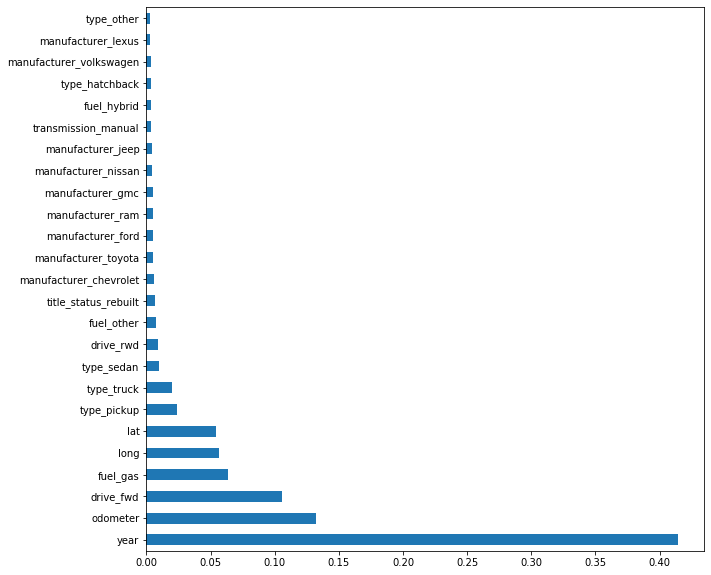

In [13]:
#Feature Importance
feat_importances = pd.Series(rfr_model.feature_importances_, index=X_head.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_residuals = lr_predictions - y_test

In [15]:
#Checking accuracy of model
lr_mean_absolute_error = MAE(y_test, lr_predictions)
print(f"Mean Absolute Error: {lr_mean_absolute_error}.")
print(f"Accuracy Percentage: {lr_model.score(X_test,y_test)}.")

Mean Absolute Error: 3793.673128725063.
Accuracy Percentage: 0.6437975641923902.


#### Plotting Residuals

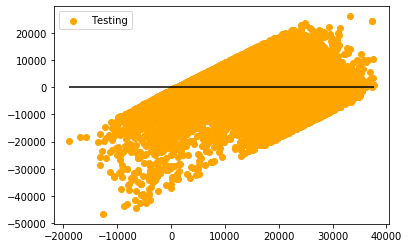

In [16]:
plt.scatter(lr_predictions, lr_residuals, c='orange', label='Testing')
plt.hlines(y=0, xmin=lr_predictions.min(), xmax=lr_predictions.max())
plt.legend()

## Lasso Regression

In [17]:
from sklearn.linear_model import Lasso

# Create Lasso Regression Model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

In [20]:
#Checking accuracy of model
lasso_mean_absolute_error = MAE(y_test, lasso_predictions)
print(f"Mean Absolute Error: {lasso_mean_absolute_error}.")
print(f"Accuracy Percentage: {lasso_model.score(X_test,y_test)}.")

Mean Absolute Error: 3793.5810319720595.
Accuracy Percentage: 0.6438096854116828.


## Ridge Regression

In [21]:
from sklearn.linear_model import Ridge

# Create Ridge Regression Model
rr_model = Ridge()
rr_model.fit(X_train, y_train)
rr_predictions = rr_model.predict(X_test)

In [22]:
#Checking accuracy of model
rr_mean_absolute_error = MAE(y_test, rr_predictions)
print(f"Mean Absolute Error: {rr_mean_absolute_error}.")
print(f"Accuracy Percentage: {rr_model.score(X_test,y_test)}.")

Mean Absolute Error: 3793.673526499802.
Accuracy Percentage: 0.6437975858974727.


## Model Accuracy Comparison

In [23]:
rfr_accuracy = rfr_model.score(X_test,y_test)
lr_accuracy = lr_model.score(X_test,y_test)
lasso_accuracy = lasso_model.score(X_test,y_test)
rr_accuracy = rr_model.score(X_test,y_test)

print(f"Random Forest Regression Accuracy Percentage: {rfr_accuracy}")
print(f"Linear Regression Accuracy Percentage: {lr_accuracy}")
print(f"Lasso Regression Accuracy Percentage: {lasso_accuracy}")
print(f"Ridge Regression Accuracy Percentage: {rr_accuracy}")

Random Forest Regression Accuracy Percentage: 0.8757341477530972
Linear Regression Accuracy Percentage: 0.6437975641923902
Lasso Regression Accuracy Percentage: 0.6438096854116828
Ridge Regression Accuracy Percentage: 0.6437975858974727
